In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import joblib
import pandas as pd
import numpy as np
import math
from src.models import eval_model

In [3]:
X_train = joblib.load("../data/processed/X_train")
y_train = joblib.load("../data/processed/y_train")
X_val = joblib.load("../data/processed/X_val")
y_val = joblib.load("../data/processed/y_val")

In [4]:
max_roc_auc_score = 0.0
def get_roc_auc_score(classifier):
    global max_roc_auc_score
    model, roc_score_training, roc_score_val = eval_model.eval_model(classifier, X_train, y_train, X_val, y_val)
    combined_roc_auc_score = roc_score_val * (1 - abs(roc_score_training - roc_score_val)**2)

    if max_roc_auc_score < combined_roc_auc_score:
        print(u"\U0001F525"+" The score " + str(combined_roc_auc_score) + " is better than "+ str(max_roc_auc_score) + " so save the model "+u"\U0001F525")
        joblib.dump(model, "../models/kpw_best_model")
        max_roc_auc_score = combined_roc_auc_score

Accuracy Score:  0.83375  F1 Score  0.9088104216660953  Recall Score  0.9954938039804732  R2 Score  0.83375  ROC_AUC_SCORE  0.7047104223614732 ( training )
Accuracy Score:  0.8375  F1 Score  0.9112627986348123  Recall Score  0.9940431868950111  R2 Score  0.8375  ROC_AUC_SCORE  0.7069108882778841 ( valuation )
🔥 The score 0.7069074653798413 is better than 0.0 so save the model 🔥


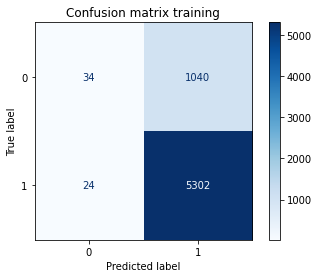

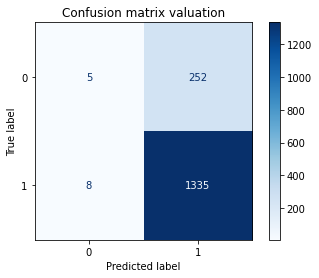

In [5]:
from sklearn.linear_model import LogisticRegression
get_roc_auc_score(LogisticRegression())

Accuracy Score:  0.83375  F1 Score  0.9088104216660953  Recall Score  0.9954938039804732  R2 Score  0.83375  ROC_AUC_SCORE  0.7047104223614732 ( training )
Accuracy Score:  0.8375  F1 Score  0.9112627986348123  Recall Score  0.9940431868950111  R2 Score  0.8375  ROC_AUC_SCORE  0.7069108882778841 ( valuation )


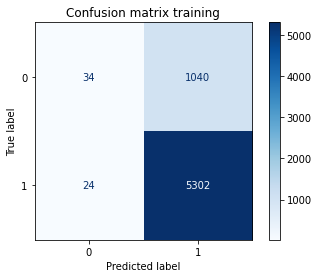

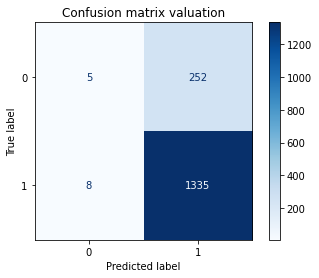

In [6]:
get_roc_auc_score(LogisticRegression(l1_ratio=0.5))

Accuracy Score:  0.83375  F1 Score  0.9088104216660953  Recall Score  0.9954938039804732  R2 Score  0.83375  ROC_AUC_SCORE  0.7047104223614732 ( training )
Accuracy Score:  0.8375  F1 Score  0.9112627986348123  Recall Score  0.9940431868950111  R2 Score  0.8375  ROC_AUC_SCORE  0.7069108882778841 ( valuation )


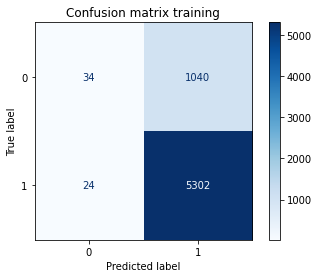

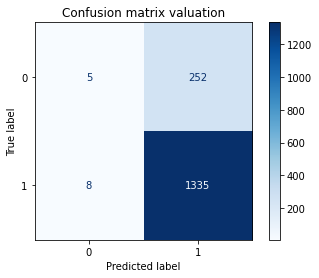

In [7]:
get_roc_auc_score(LogisticRegression(random_state=8))

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( training )
Accuracy Score:  0.834375  F1 Score  0.9088407292741658  Recall Score  0.9836187639612807  R2 Score  0.834375  ROC_AUC_SCORE  0.6617205223221141 ( valuation )


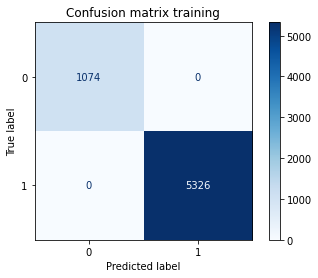

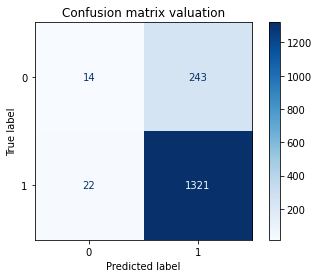

In [8]:
from sklearn.ensemble import RandomForestClassifier
get_roc_auc_score(RandomForestClassifier())

Accuracy Score:  0.848125  F1 Score  0.9163799036476256  Recall Score  1.0  R2 Score  0.848125  ROC_AUC_SCORE  0.8876323310473688 ( training )
Accuracy Score:  0.839375  F1 Score  0.9123764064098192  Recall Score  0.996276991809382  R2 Score  0.839375  ROC_AUC_SCORE  0.6846626548959731 ( valuation )


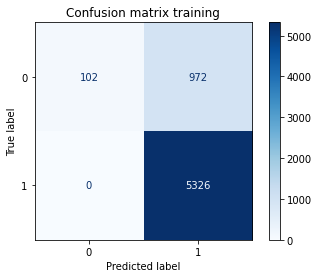

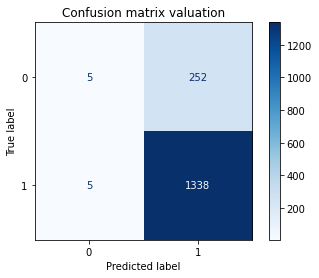

In [9]:
get_roc_auc_score(RandomForestClassifier(n_estimators = 150, random_state = 8, max_depth = 8, min_samples_leaf = 2))